## RRSG 2019 Challenge 

#### Load ISMRM RRSG 2019 challenge data. Please see [this OSF repository](https://osf.io/xne9w/) for details. 

In [1]:
load('/tmp/rrsg_challenge/brain_radial_96proj_12ch.mat');
whos % Show variables in the current scope 

Variables in the current scope:

   Attr Name            Size                     Bytes  Class
   ==== ====            ====                     =====  ===== 
        ans             1x5                          5  char
   c    rawdata        12x96x512               4718592  single
        trajectory     96x512x3                 589824  single

Total is 737285 elements using 5308421 bytes



#### Change data order to follow BART's dimension convention and display the rawdata from all (12) channels. 

<div class="alert alert-danger">
  <strong>Warning!</strong> Do not run this cell more than once after running the previous cell.

</div>


In [2]:
rawdata = permute(rawdata,[4,3,2,1]); 
trajectory = permute(trajectory,[3,2,1]);
[~,nFE,nSpokes,nCh] = size(rawdata);

* Display input data

In [ ]:
for ii=1:12
cc = squeeze((rawdata(1,:,:,ii)));
% Brighten convention is not 1/1 with matlab.  
subplot(2,6,ii); 
imshow(log(1+abs(cc)),[-0 0.0001]); brighten(0.4); title(['Ch ' num2str(ii)]);
end


ksp_rss = bart('rss 8', rawdata);
figure();
scatter3(trajectory(1, :), trajectory(2,:), trajectory(3,:),[],reshape(squeeze(log(ksp_rss)),[1 nFE*nSpokes]));


In [ ]:
figure, scatter3(trajectory(1, :), trajectory(2,:)), 
title('Radial trajectory')


In [15]:
sens = bart('slice 4 0', calib);
size(sens)

ans =

     1   512    96    12



In [16]:
igrid = bart('nufft -i -t', trajectory, rawdata);


Est. image size: 300 300 1
Done.


error: reshape: can't reshape 1152x1x512 array to 384x2x512 array
error: called from
    imshow3 at line 44 column 6
error: reshape: can't reshape 1152x1x512 array to 384x2x512 array
error: called from
    imshow3 at line 44 column 6


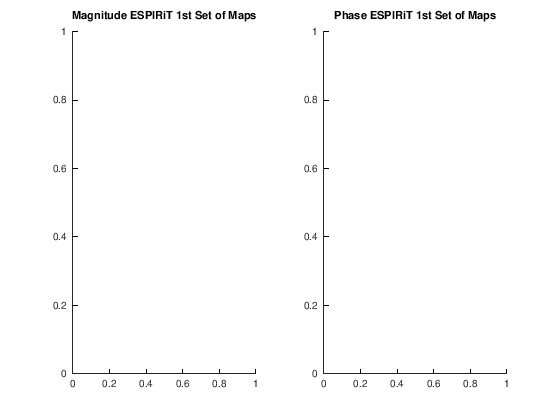

In [14]:
sens_maps = squeeze(sens);

figure,
subplot(121), imshow3(abs(sens_maps), [],[2,4]);
title('Magnitude ESPIRiT 1st Set of Maps')
subplot(122), imshow3(angle(sens_maps),[],[2,4])
title('Phase ESPIRiT 1st Set of Maps')

In [10]:
kk = bart('pics -t',trajectory,rawdata,calib);

2 maps.
ESPIRiT reconstruction.
conjugate gradients
Total Time: 29.389642


In [12]:
size(kk)

ans =

     1   512    96     1     2



In [ ]:
function [outRD, outTR] = subSample(RD,TR,factor,nSpokes)

    outTR = TR(:,:,1:factor:nSpokes);
    outRD = RD(:,:,1:factor:nSpokes,:);

end